### LogReg

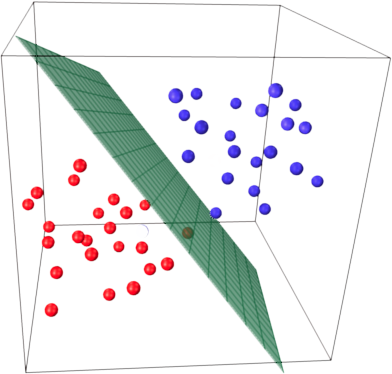

### Виды классификаций

- бинарная - Кредитный скоринг - каждому объекту пренадлежит один из двух классов

- мультикласс - Распознавание рукописных цифр (0-9) — каждому объекту пренадлежит один из n (где n > 2) классов

- мультилейбл - Предсказание жанра фильму - каждому объекту может пренадлежать как один так и несоклько классов

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

In [56]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, threshold=0.5):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.threshold = threshold
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iterations):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return [1 if i > self.threshold else 0 for i in y_pred]


$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

$$ \frac{\partial MSE}{\partial \mathbf{w}} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \mathbf{x}_i = \frac{2}{n} \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y}) $$
$$ \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) $$

$$ \text{Log Loss} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

$$ \frac{\partial \text{Log Loss}}{\partial \mathbf{w}} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \mathbf{x}_i = \frac{1}{n} \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y}) $$
$$ \frac{\partial \text{Log Loss}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) $$


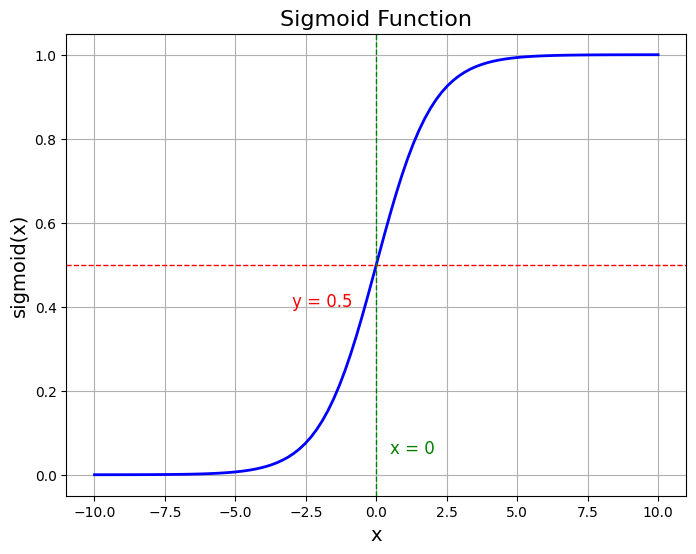

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', linewidth=2)
plt.title('Sigmoid Function', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('sigmoid(x)', fontsize=14)
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0, color='green', linestyle='--', linewidth=1)
plt.text(-3, 0.4, 'y = 0.5', fontsize=12, color='red')
plt.text(0.5, 0.05, 'x = 0', fontsize=12, color='green')
plt.show()

In [58]:
array = np.array([-2,-1,0,1,2])

In [59]:
1 / (1 + np.exp(-array))

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

In [60]:
np.sign(array)

array([-1, -1,  0,  1,  1])

In [61]:
class LogisticRegressionMultiClass:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        self.weights = np.zeros((n_classes, n_features))

        y_encoded = np.eye(n_classes)[y]

        for _ in range(self.num_iter):
            z = np.dot(X, self.weights.T)
            predictions = self.softmax(z)
            gradient = np.dot((predictions - y_encoded).T, X) / n_samples
            self.weights -= self.lr * gradient

    def predict_proba(self, X):
        X = np.insert(X, 0, 1, axis=1)
        z = np.dot(X, self.weights.T)
        probabilities = self.softmax(z)
        return probabilities

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

In [62]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, n_classes=4, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
logreg = LogisticRegression()
my_logreg = LogisticRegressionMultiClass()

In [64]:
logreg.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)

log_pred = logreg.predict(X_test)
my_log_pred = my_logreg.predict(X_test)

In [65]:
print(f'sklearn logreg\n {classification_report(y_test, log_pred)}')
print(f'our logreg\n {classification_report(y_test, my_log_pred)}')

sklearn logreg
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       483
           1       0.83      0.78      0.81       497
           2       0.86      0.85      0.86       518
           3       0.79      0.80      0.80       502

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

our logreg
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       483
           1       0.83      0.79      0.81       497
           2       0.87      0.85      0.86       518
           3       0.79      0.80      0.80       502

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

